In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [75]:
# acquiring data sets
customers = pd.read_csv("./data/customers.csv")
products = pd.read_csv('./data/products.csv')
transactions = pd.read_csv('./data/transactions.csv')

data = pd.read_csv('./data/data.csv')

## Cleaning data set from test data!

**After deducing that transaction has this test data and that is also the right data set to use for a combine all others'
data sets, because its identify all the others' data sets. I can use it to check all id
that have this test value.**

## Merge data sets to a single Dataframe.

**After cleaning the all data set I can create a new data set merge from them and use it for further analysis**

This step is done with the ETL script available on the project it exports the data_clean.zip file containing the data.csv

imported above.

In [76]:
# plots configuration
#fig, ax = plt.subplots(figsize=(20,10))
height, aspect = (8, 2)
sns.set_style("whitegrid",  {"xtick.major.size": 8, "ytick.major.size": 8,})
sns.set_context(font_scale=2.5)
sns.set(rc={'figure.figsize':(15,10)})

# Initial Data analysis exploration.

## Analysis of the dataset and its structures

**Displaying the first and last 5 row of Customers data set.**

Getting to know more about its values with info and describe.

In [77]:
data.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,4.99,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,4.99,0
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,4.99,0
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,4.99,0


In [78]:
data.tail()

,id_prod,date,session_id,client_id,sex,birth,price,categ
336708,0_1920,2021-04-13 18:36:10.252971,s_20115,c_7088,m,1987,25.16,0
336709,0_1920,2021-05-30 02:37:22.371278,s_41465,c_7748,f,1989,25.16,0
336710,2_23,2021-09-27 04:47:02.271354,s_96170,c_3976,f,1992,115.99,2
336711,2_28,2021-05-11 01:31:34.932056,s_32812,c_7613,f,1993,103.50,2
336712,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,f,2003,149.74,2


Getting data type information. Its seams that it doesn't contain null values there is only 3 numerical value.

There is clearly a category value on the sex column and client_id seams as identify that can be used for table
interaction or join.

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336713 non-null  object 
 1   date        336713 non-null  object 
 2   session_id  336713 non-null  object 
 3   client_id   336713 non-null  object 
 4   sex         336713 non-null  object 
 5   birth       336713 non-null  int64  
 6   price       336713 non-null  float64
 7   categ       336713 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 20.6+ MB


The description show information about all its column in particular **Birth**.

The first and last 1929, 2004
Seam to describe the non-recorded linux date time that would start from 1970 so that 1929 and not 1970 the min year

* minimum year value 1929 maximum year value 2004.
* There are 75 years values observed.
* Price Mean is 17.215189.
* Price min 0.62 and max 300.00

In [80]:
data.describe()

,birth,price,categ
count,336713.000000,336713.000000,336713.000000
mean,1977.823568,17.215189,0.430156
std,13.524433,17.855445,0.591082
min,1929.000000,0.620000,0.000000
25%,1971.000000,8.610000,0.000000
50%,1980.000000,13.900000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


**Identifying data numerical values and from categorical ones.**

There is 3 numerical values here:

*price, birth and categ* but this last one is used as categorical value instead.

In [81]:
data[['birth', 'price', 'categ']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   birth   336713 non-null  int64  
 1   price   336713 non-null  float64
 2   categ   336713 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 7.7 MB


**therefore how many categories of products there is?**

In [82]:
print("unique categories of products values", data.categ.unique())

unique categories of products values [0 1 2]


## What are the Unique values that can be used as identified here?

There is 3 of them with a prefix or suffix **id**,  they are already visible by displaying the first 5 observations.

session_id is a new identify here.
use this values to display the columns with ids...

In [83]:
print('identifies with suffix or prefix ID: ', data.columns[data.columns.str.contains('id')].values)

identifies with suffix or prefix ID:  ['id_prod' 'session_id' 'client_id']


**Date** is clear a date type it could or should be converted to its proper type using *to_datetime()*

In [84]:
# Convert date to date time type.
data.date = pd.to_datetime(data.date)
data.date.describe()

<ipython-input-84-17e2bb61bffa>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                         336713
unique                        336713
top       2021-11-06 19:38:11.250720
freq                               1
first     2021-03-01 00:01:07.843138
last      2022-02-28 23:59:58.040472
Name: date, dtype: object

# Task 2

## starting visualization distribution analysis

**Age distribution**

This visualization describes the concentration of age in our data set.
the frequency of certain ages like 30-50 is very visible in the visualization.
its min 20 and max 90 has an 60 age difference having young 20-30 people more frequent then oulders ones 80-90+ .

In [85]:
age_decades = [10,20,30,40,50,60,70,80,90,100]
age_labels = ['10s','20s','30s','40s','50s','60s','70s','80s','90s']

weeks_order = [0,1,2,3,4,5,6]
weeks_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

months_order = [1,2,3,4,5,6,7,8,9,10,11,12]
months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                 'October', 'November', 'December']


In [86]:
# creating var age by subtracting the current year with the birth values.
data['age'] = 2021 - data.birth

In [87]:
# creating var age_group and column price range by subtracting price max value to its minimum value.
age_group = data.groupby(['age'])['price'].apply(lambda group : group.tolist()).reset_index()
age_group = pd.DataFrame(age_group) #- age_group.price.min
age_group['price_range'] = age_group.price.apply(lambda prices: max(prices) - min(prices))

In [88]:
# calculating the var price range.
price_range = data.price.max() - data.price.min()

The age distribution on the consider data set.
Age values from 30 to 40 are more prevalent.

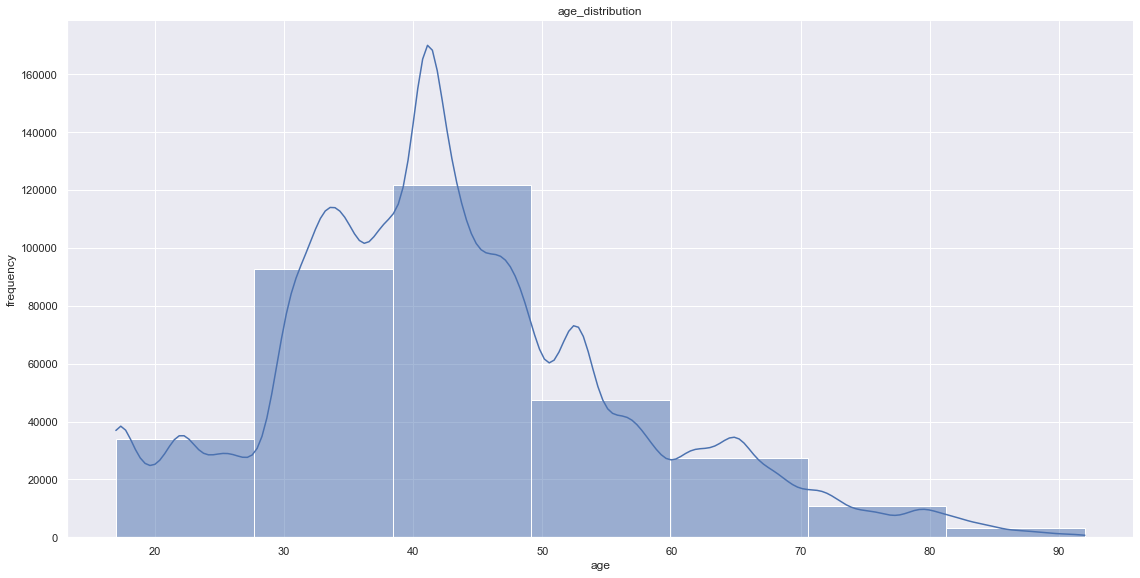

In [89]:
# distribution.
sns.displot(data=data, x='age', kind='hist', bins=7, kde=True, height=height, aspect=aspect)\
    .set( title='age_distribution', ylabel= 'frequency').savefig('./P5_03_graphics/age_distribution.png', dpi=300)

## Price range distribution and Correlation

On this viz is clear to see where higher prices are concentrated 150-250.
its minimal 50 and max 300 have a difference of 250 with is minimal have almost a double of its frequency.

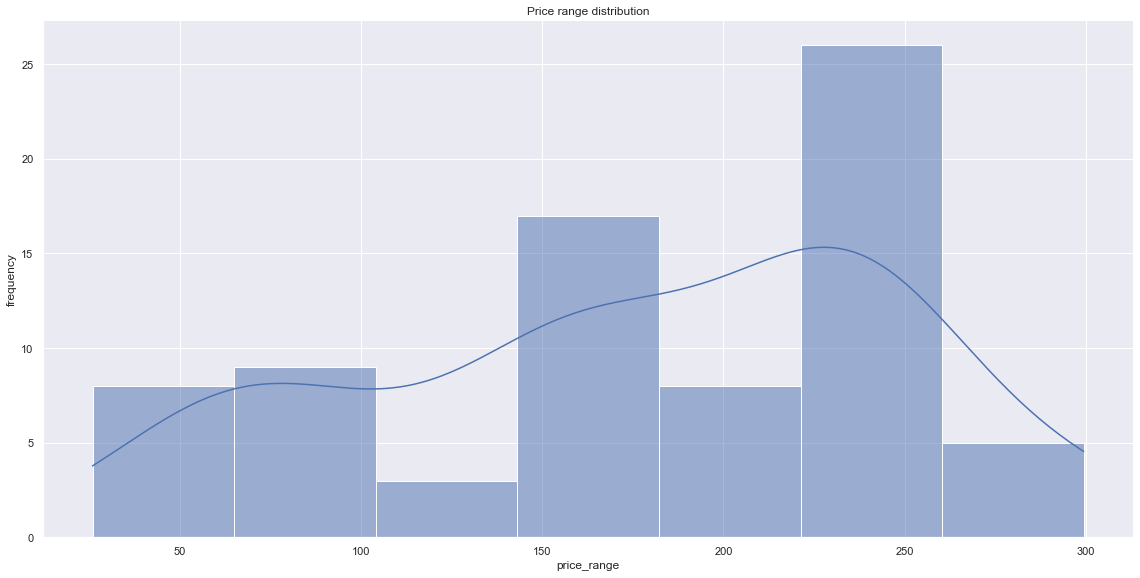

In [90]:
# distribution.
sns.displot(data=age_group, x='price_range', bins=7, kde=True, height=height, aspect=aspect)\
    .set( title='Price range distribution', ylabel= 'frequency').savefig('./P5_03_graphics/age_price_range.png', dpi=300)

**A pearson correlation**

Here is showing a more clear dispersion and concentration of price range and age.
It seems tha younger ones from 20-40 expend quite more than older ones 70-90.
after 40 until around 65 the expenses stay stable between 150 and 250.

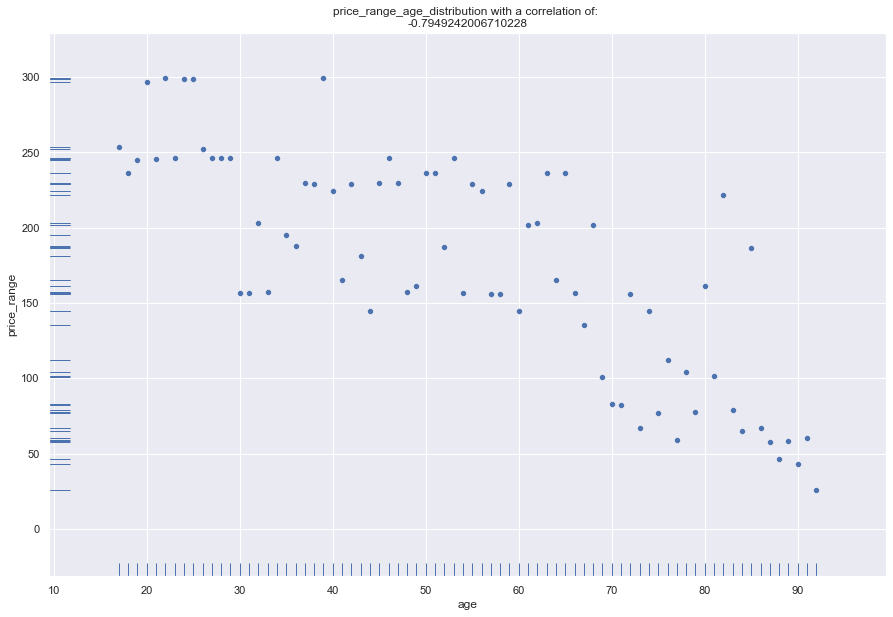

In [91]:
# Price range and age Correlation.
title = "price_range_age_distribution with a correlation of: \n{corr}".format(corr = age_group['price_range'].corr(age_group.age, method='pearson'))

sns.scatterplot(data=age_group, x='age', y='price_range', )
sns.rugplot(data=age_group, x='age', y='price_range', )
plt.title(title)
plt.savefig('./P5_03_graphics/price_range_age_distribution.png', dpi=300)

**Time distribution**

Here is the most frequent usage time. Is very homogenous, nevertheless there is a slight pick at 9 hour and 19 hour.

In [92]:
#time_of_day = dict({'Morning': 1, 'Dawn': 6, 'Midday': 12, 'Afternoon': 17, 'Evening': 18, 'Midnight': 24})
# distribution.
hour_counted = pd.DataFrame(data.date.dt.hour.value_counts()).reset_index()
hour_counted.rename(columns={'index': 'hours', 'date': 'frequency'}, inplace=True)

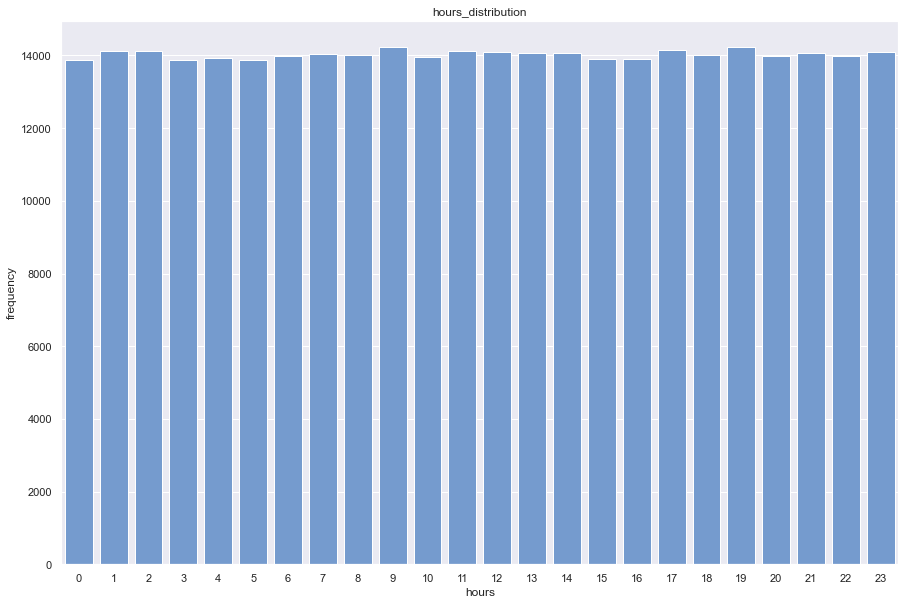

In [93]:
sns.barplot(data=hour_counted, x='hours', y='frequency', color='#69d')
plt.title('hours_distribution')
plt.savefig('./P5_03_graphics/hours_distribution.png', dpi=300)

**date distribution**

On the months' distribution there is quite stable activity until 2021-06.

This period of instability finish after reaching the maximal 2021-09 and, the minimal 2021-11 month activity.

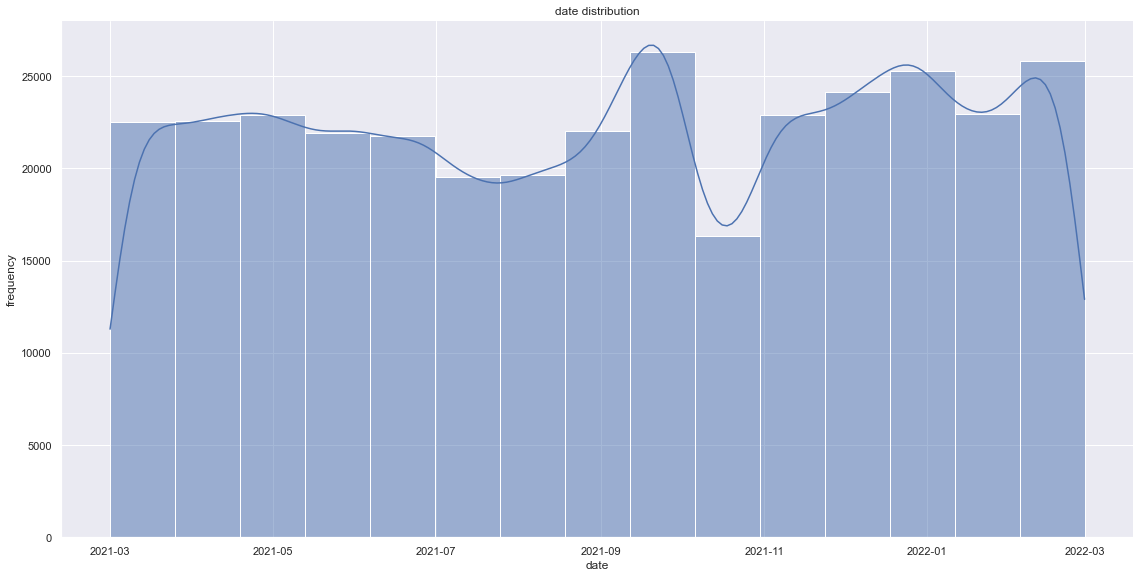

In [94]:
# distribution.
sns.displot(data=data, x='date', bins=15, kde=True, height=height, aspect=aspect).set_ylabels('frequency').set(title='date distribution')

**Category distribution**

This distribution show clear the most frequent Category of products.
This make sense as we know that the Category of product 2 is the most expensive ones.

In [95]:
# distribution.
categs = pd.DataFrame(data['categ'].value_counts()).reset_index()
categs.rename(columns={'index': 'categ', 'categ': 'frequency'}, inplace=True,)

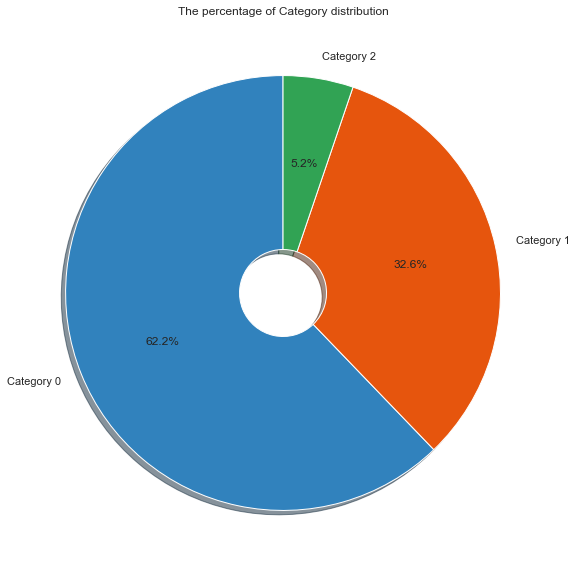

In [96]:
fig, ax = plt.subplots()
labels = 'Category 0', 'Category 1', 'Category 2',
width = 0.8
vals = categs

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%', labels= labels,
       wedgeprops=dict(width=width, edgecolor='w'), startangle=90, shadow=True)

ax.set(aspect="equal", title='The percentage of Category distribution')
fig.savefig('./P5_03_graphics/pie_ceteg_distribution.png', dpi=300)
plt.show()

**Users session counts and distribution**

Based on the clients' id how is the amount of users distributed on the week days?

In [97]:
# Creating a dataframe with client info like id and date in order to extract dates information
# like months hours day relate to client
session_client = pd.DataFrame(data[['client_id', 'date']]).reset_index()
session_client_group =  pd.DataFrame(data.groupby(['client_id']).head()[['client_id', 'date']]).reset_index()
session_client_group['hours'] = session_client_group.date.dt.hour
session_client_group['days'] = session_client_group.date.dt.day
session_client_group['week_days'] = session_client_group.date.dt.day_name()
session_client_group['months'] = session_client_group.date.dt.month_name()
session_client_group.drop(columns='index', inplace=True)

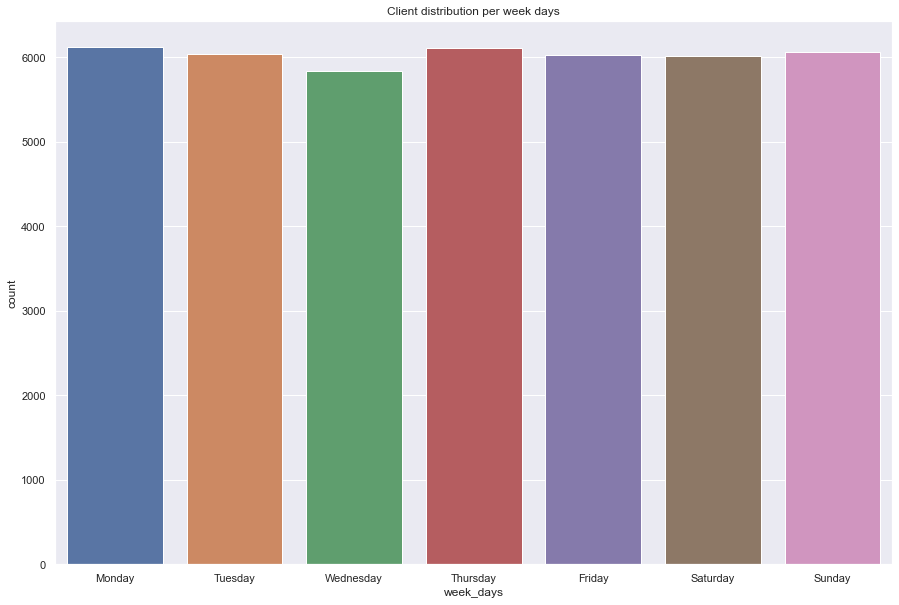

In [98]:
# Client distribution per week days.
sns.countplot(data=session_client_group, x='week_days', order=weeks_labels)
plt.title('Client distribution per week days')
plt.savefig('./P5_03_graphics/week_day_distribution.png', dpi=300)

What then if we consider the amount of users per months how would the distribution look like?
There is a quite steadier decrease of users from February until August.
This trend should be continued from september to October if there was not for a data anomaly October.

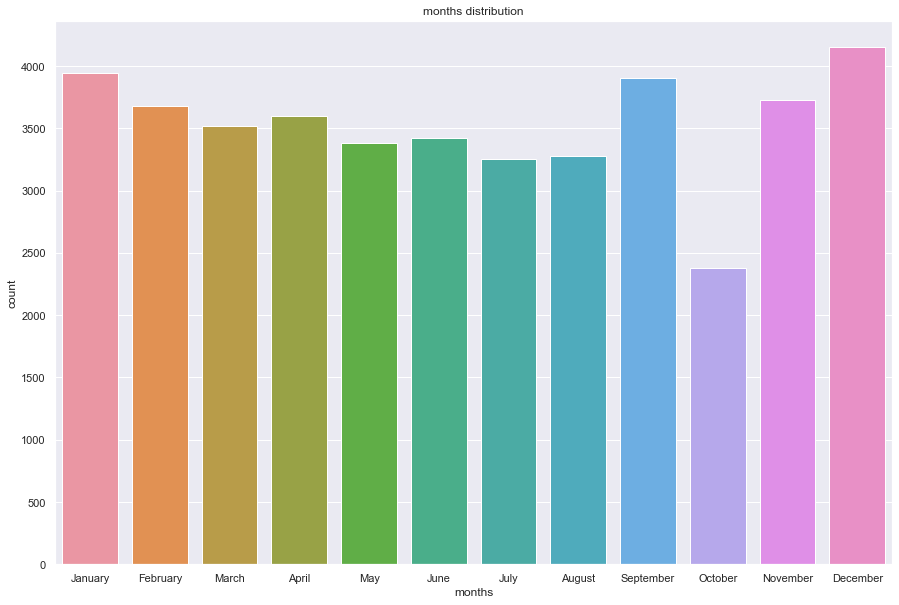

In [99]:
# Client distribution

sns.countplot(data=session_client_group, x='months', order=months_labels)
plt.title('months distribution')
plt.savefig('./P5_03_graphics/months_distribution.png', dpi=300)

## Month distribution anomaly Analysis

**Comparing October months to close months values**

In [100]:
anomaly_data = data
anomaly_data['months'] = anomaly_data.date.dt.month_name()


Describing September and getting info.

In [101]:
#check data month description.
september = anomaly_data[anomaly_data.months == 'September']

september.describe()

,birth,price,categ,age
count,33254.000000,33254.000000,33254.000000,33254.000000
mean,1977.333764,15.119122,0.331268,43.666236
std,12.880245,13.768772,0.523548,12.880245
min,1929.000000,0.660000,0.000000,17.000000
25%,1971.000000,7.990000,0.000000,35.000000
50%,1979.000000,12.990000,0.000000,42.000000
75%,1986.000000,17.990000,1.000000,50.000000
max,2004.000000,247.220000,2.000000,92.000000


In [102]:
#check data month info.
september.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33254 entries, 4 to 336710
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     33254 non-null  object        
 1   date        33254 non-null  datetime64[ns]
 2   session_id  33254 non-null  object        
 3   client_id   33254 non-null  object        
 4   sex         33254 non-null  object        
 5   birth       33254 non-null  int64         
 6   price       33254 non-null  float64       
 7   categ       33254 non-null  int64         
 8   age         33254 non-null  int64         
 9   months      33254 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 2.8+ MB


**Visualising September to check for irregularity**

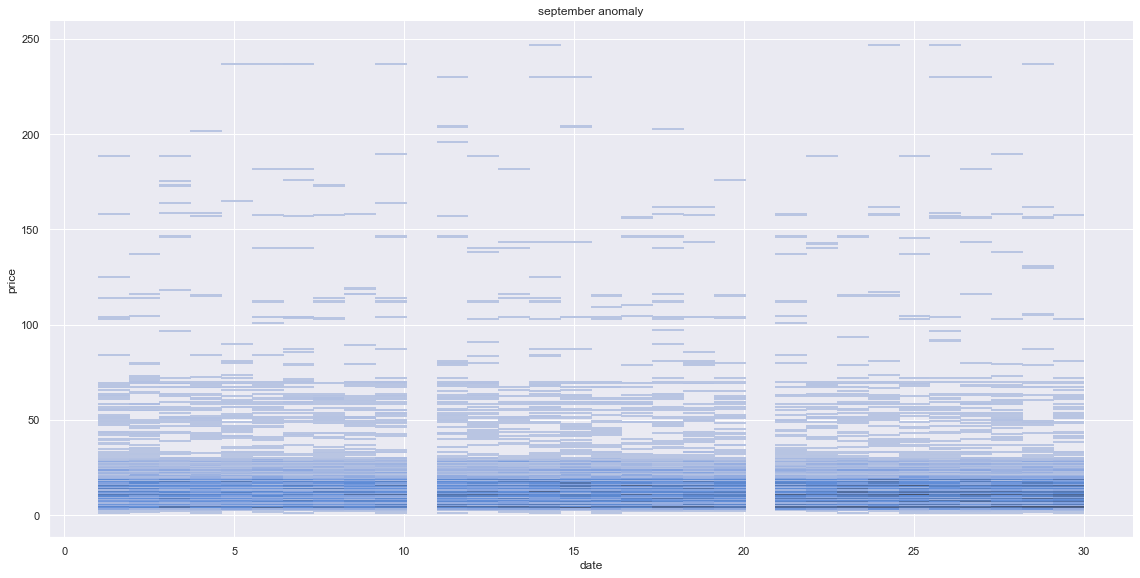

In [103]:
sns.displot(data = september, x= september.date.dt.day, y='price', aspect=aspect, height= height )\
    .set(title='september anomaly').savefig('./P5_03_graphics/september_anomaly.png', dpi=300)

Describing October and getting info.
It has a very low minimal price but it not the cause.
It has also fewer entries and therefore less memory usage.

In [104]:
#check data month description.

october = anomaly_data[anomaly_data.months == 'October']
october.describe()

,birth,price,categ,age
count,21577.000000,21577.000000,21577.000000,21577.000000
mean,1978.866710,14.791674,0.184734,42.133290
std,12.243654,17.539109,0.508076,12.243654
min,1929.000000,0.620000,0.000000,17.000000
25%,1973.000000,6.990000,0.000000,34.000000
50%,1980.000000,11.030000,0.000000,41.000000
75%,1987.000000,15.990000,0.000000,48.000000
max,2004.000000,247.220000,2.000000,92.000000


In [105]:
#check data month info.

october.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 2 to 336700
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     21577 non-null  object        
 1   date        21577 non-null  datetime64[ns]
 2   session_id  21577 non-null  object        
 3   client_id   21577 non-null  object        
 4   sex         21577 non-null  object        
 5   birth       21577 non-null  int64         
 6   price       21577 non-null  float64       
 7   categ       21577 non-null  int64         
 8   age         21577 non-null  int64         
 9   months      21577 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.8+ MB


In [106]:
print('October sum of null values', october.isnull().sum(axis=0))

October sum of null values id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
age           0
months        0
dtype: int64


**Visualising October to check for irregularity**


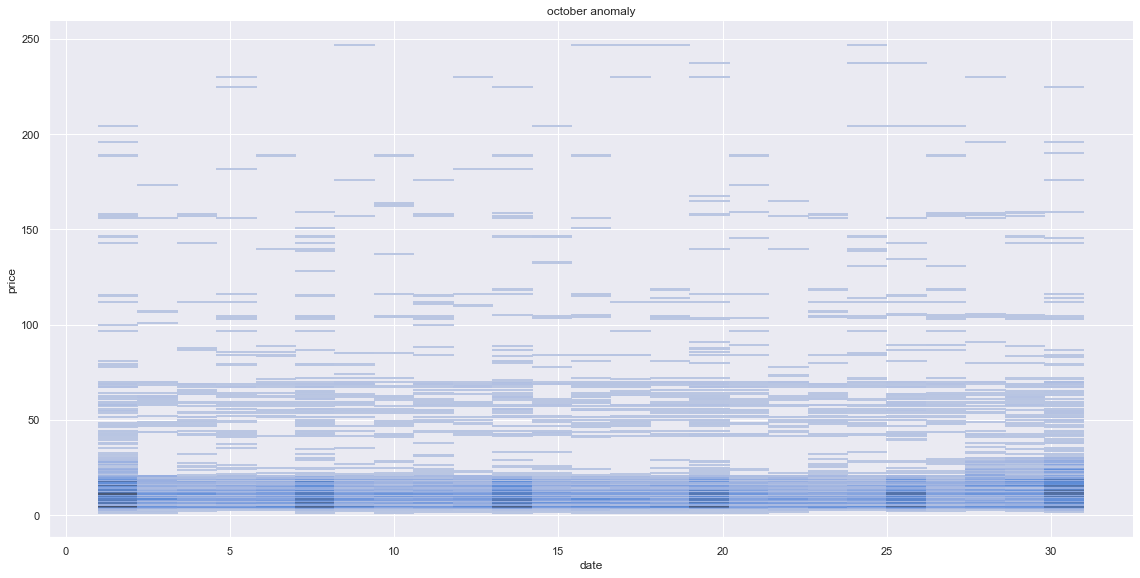

In [107]:
sns.displot(data = october, x= october.date.dt.day, y='price',aspect=aspect, height= height )\
    .set(title='october anomaly').savefig('./P5_03_graphics/october_anomaly.png', dpi=300)

Describing November and getting info.

In [108]:
#check data month description.

november = anomaly_data[anomaly_data.months == 'November']
november.describe()

,birth,price,categ,age
count,28267.000000,28267.000000,28267.000000,28267.000000
mean,1977.425443,18.144485,0.532847,43.574557
std,13.927509,17.554585,0.588284,13.927509
min,1929.000000,0.930000,0.000000,17.000000
25%,1969.000000,9.880000,0.000000,34.000000
50%,1979.000000,14.990000,0.000000,42.000000
75%,1987.000000,20.830000,1.000000,52.000000
max,2004.000000,254.440000,2.000000,92.000000


In [109]:
#check data month info.

november.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28267 entries, 9 to 336702
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     28267 non-null  object        
 1   date        28267 non-null  datetime64[ns]
 2   session_id  28267 non-null  object        
 3   client_id   28267 non-null  object        
 4   sex         28267 non-null  object        
 5   birth       28267 non-null  int64         
 6   price       28267 non-null  float64       
 7   categ       28267 non-null  int64         
 8   age         28267 non-null  int64         
 9   months      28267 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 2.4+ MB


**Visualising November to check for irregularity**

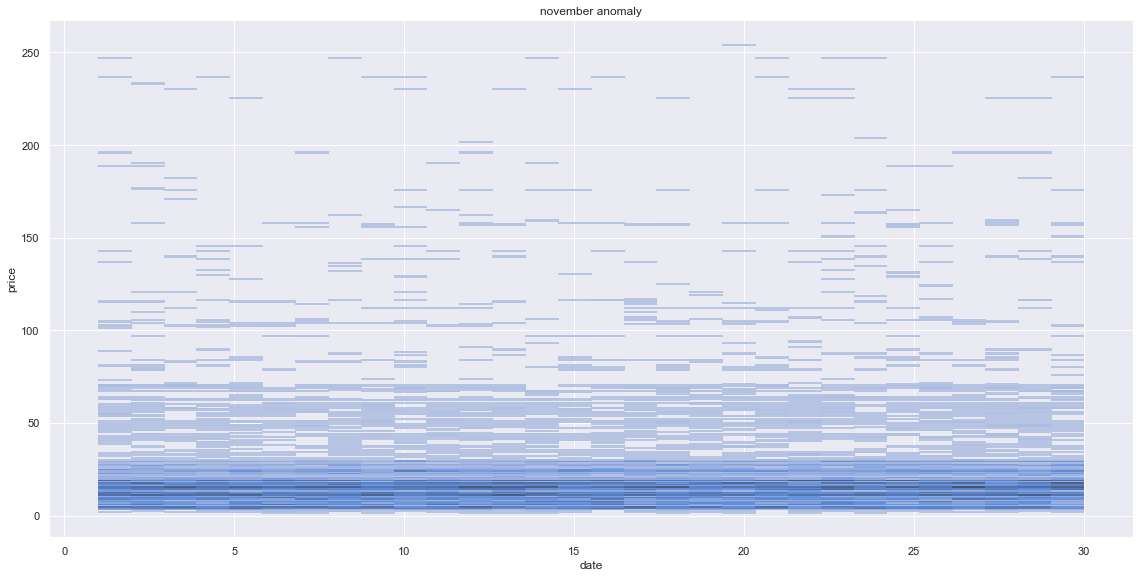

In [110]:
sns.displot(data = november, x= november.date.dt.day, y='price', aspect=aspect, height= height )\
    .set(title='november anomaly').savefig('./P5_03_graphics/november_anomaly.png', dpi=300)


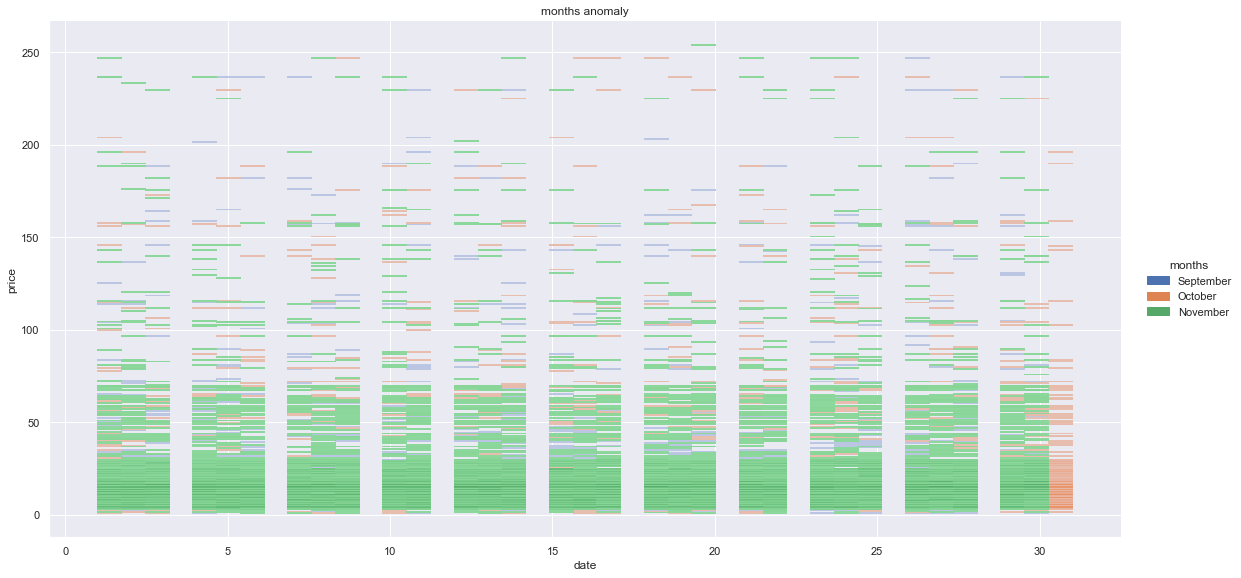

In [111]:
months_s_n_o = pd.concat([september, october]).append(november)

sns.displot(data = months_s_n_o, x= months_s_n_o.date.dt.day, y='price', hue='months', aspect=aspect, height= height )\
    .set(title='months anomaly').savefig('./P5_03_graphics/months_anomaly.png', dpi=300)

In [112]:
# Checking more months data and display they statistical summary.
anomaly_data =  pd.DataFrame({
    'July': anomaly_data[anomaly_data.months == 'July'].shape,
    'August': anomaly_data[anomaly_data.months == 'August'].shape,
    'September': anomaly_data[anomaly_data.months == 'September'].shape,
    'October': anomaly_data[anomaly_data.months == 'October'].shape,
    'November': anomaly_data[anomaly_data.months == 'November'].shape,
    'December': anomaly_data[anomaly_data.months == 'December'].shape,
    'February': anomaly_data[anomaly_data.months == 'February'].shape,
})

**Conclusion: It just looks like that October has fewer rows then any others months and
that there is a significant amount of prices values between 20-40 from the start of the month to its end 30.
Perhaps cause by a tech problem.**

In [113]:
anomaly_data.pivot_table(index=['N_of_rows', 'N_of_columns'])

,August,December,February,July,November,October,September
N_of_columns,10,10,10,10,10,10,10
N_of_rows,25610,32417,29556,24712,28267,21577,33254


**session distribution**

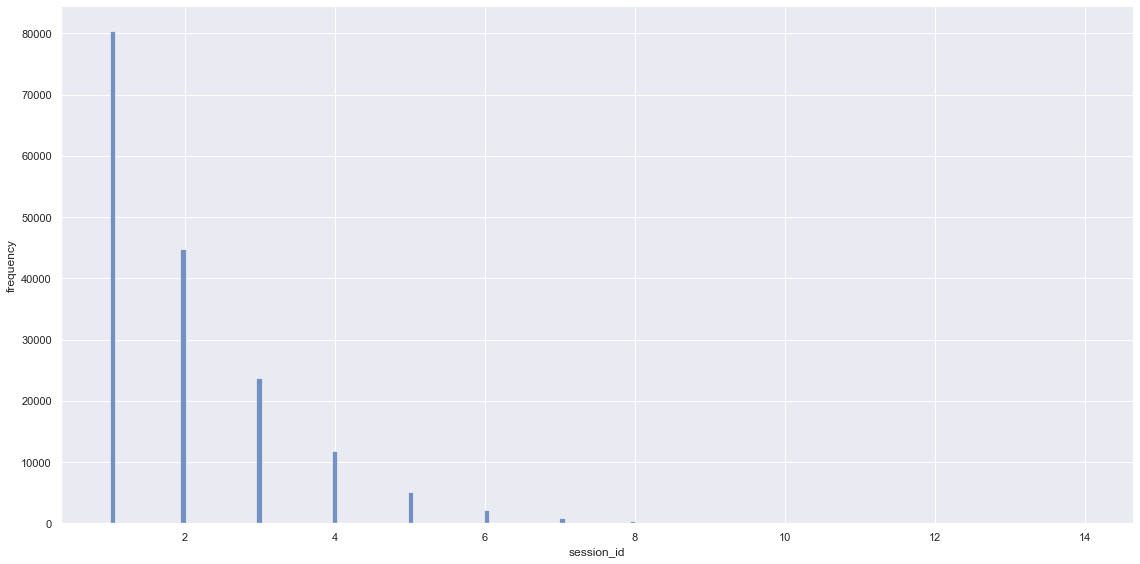

In [114]:
session = data.session_id.value_counts()
sns.displot(data=session, height=height, aspect=aspect).set_ylabels('frequency')


**sales and its distribution**

How is the distribution of lower and higher price? what is its frequency?

The answer to this question is visualized here, where lower prices are more present on the dataset.

Statistically speaking the distribution is skew to the right.

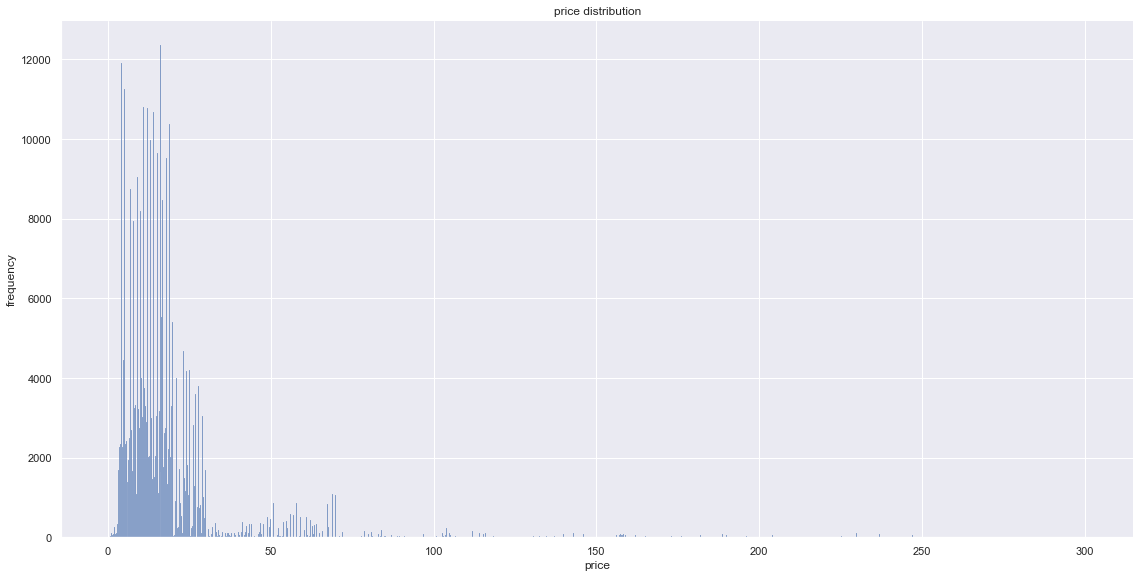

In [115]:
# distribution.
sns.displot(data=data, x='price', height=height, aspect=aspect).set_ylabels('frequency')\
    .set(title='price distribution').savefig('./P5_03_graphics/price_distribution.png', dpi=300)

## Correlation von price and categories.

Continuing with the question above, another question have arisen and is answered with this other visualization.
That is, how are the prices of each single category of products spreed?


Text(0.5, 1.0, 'category of products and its prices with a correlation of: \n-0.2115292617047145')

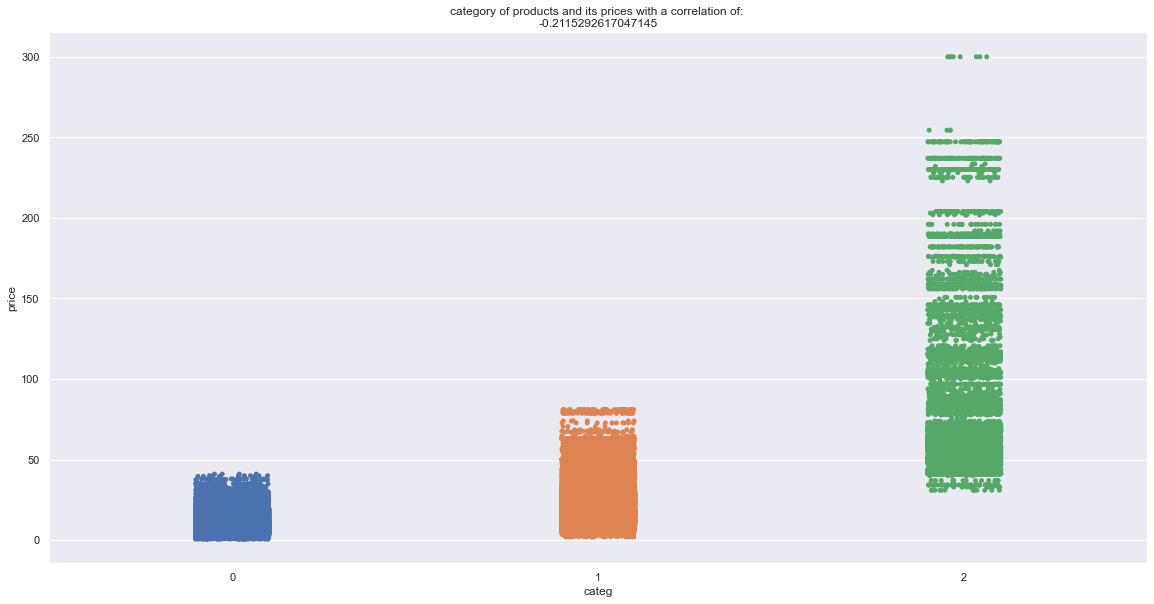

In [116]:
sns.catplot(data=data, x='categ', y='price', height=height, aspect=aspect)
title = "category of products and its prices with a correlation of: \n{corr}".format(corr = data['price'].corr(data.age, method='pearson'))

plt.title(title)

This last price visualization show the monthly revenue related to its sales volume.
The 2 line relate with each quite well but revenue clear has higher values higher picks and lower ones.
More products have been sells on September on until end December proceeding with a slight rise on february, and a drop
on july. It remains stable until May reaching its pick on November and dramatically dropping at October only to then resign on
September again.
This seams to be caused by an anomaly in the data set.

In [117]:
# Creating a dataframe group by date with price info in order to extract dates information
# like months hours day relate to sales, also retrieving sales amount volume and revenue.
sales = pd.DataFrame(data.groupby('date').head()[['date','age', 'categ', 'price']])
sales.date = sales.date.dt.date
sales['sales_amount'] = sales.price.value_counts()
sales['sales_volume'] = sales.price.count()
sales['sales_revenue'] = sales['sales_volume'] * sales.price
sales['days'] = session_client_group.date.dt.day
sales['week_days'] = session_client_group.date.dt.day_name()
sales['months'] = session_client_group.date.dt.month_name()
sales['years'] = session_client_group.date.dt.year
sales.rename(columns={'price':'price_$K'}, inplace=True)

In [118]:

sales['age_decades'] = pd.cut(sales.age,age_decades,
      labels=age_labels)

In [119]:
# aggregating volume and revenue by months.
sales_monthly_calculation = pd.DataFrame({
    'volume': sales.groupby('months')['price_$K'].count(),
    'revenue': sales.groupby('months')['price_$K'].sum()
    })

sales_monthly_calculation.columns = ['volume', 'revenue']
sales_monthly_calculation = sales_monthly_calculation.reindex(months_labels)

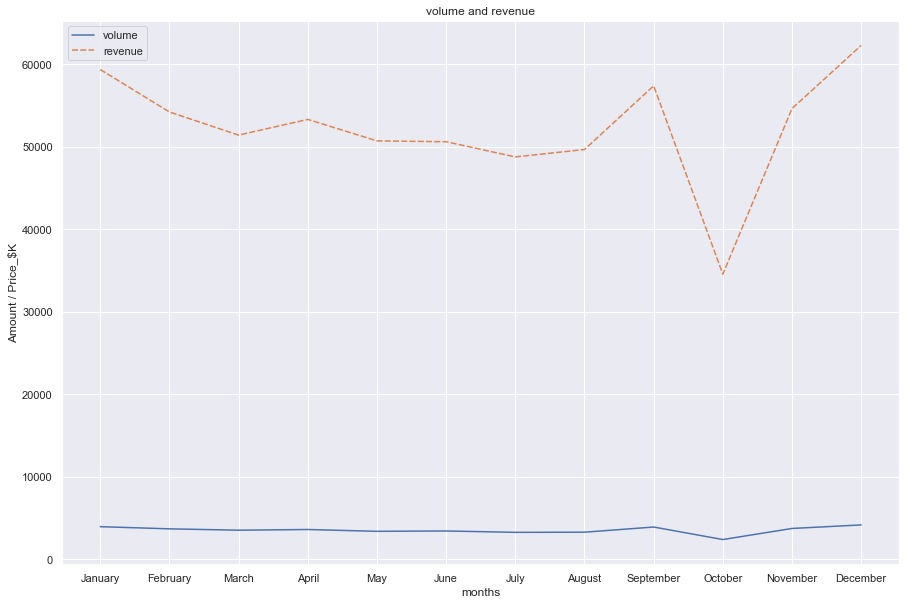

In [120]:
# visualizing sales monthly aggregation.
sns.lineplot(data=sales_monthly_calculation).set(title='volume and revenue', ylabel='Amount / Price_$K')
plt.savefig('./P5_03_graphics/volume_revenue.png', dpi=300)

Considering the daily distribution there is a drop on the month of October.

Text(0.5, 1.0, 'price distribution during the years')

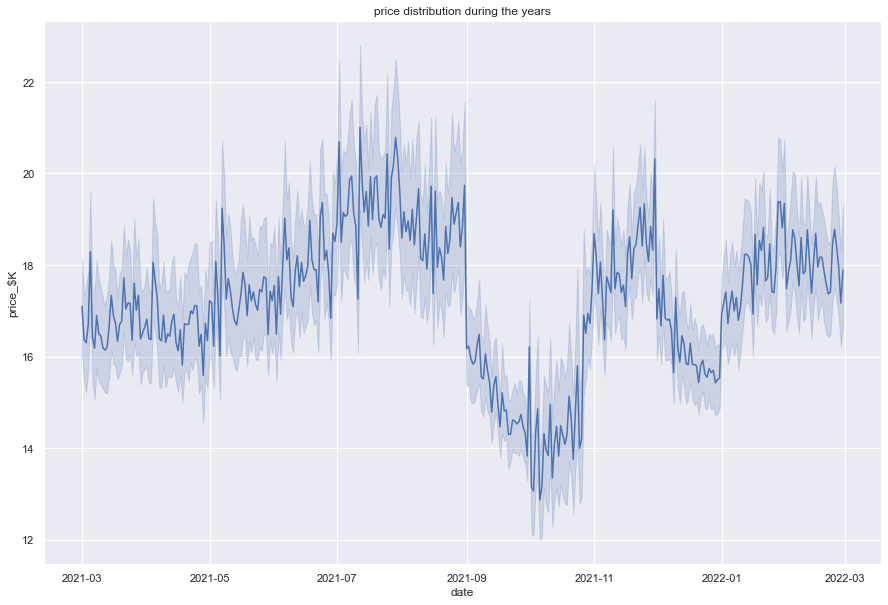

In [121]:
# visualizing prices from 2021 to 2022.
sns.lineplot(data=sales, x='date', y='price_$K')
plt.title('price distribution during the years')

**Indicators of central tendency and dispersion.**

In [122]:
# Creating tendency and dispersion based on the main data.
data_dispersion = pd.DataFrame()
data_dispersion[['median']] = pd.DataFrame(data.median())
data_dispersion[['skew']] = pd.DataFrame(data.skew())
data_dispersion[['kurtosis']] = pd.DataFrame(data.kurtosis())
data_dispersion[['var']] = pd.DataFrame(data.var())
data_dispersion

#correlation Factorized!

<ipython-input-122-9dc2d7c715bb>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_dispersion[['median']] = pd.DataFrame(data.median())


,median,skew,kurtosis,var
id_prod,1424.0,-0.823370,2.213175,NaN
birth,1980.0,-0.580417,0.452335,182.910296
price,13.9,5.479196,45.425205,318.816930
categ,0.0,1.028856,0.049616,0.349378
age,41.0,0.580417,0.452335,182.910296


<AxesSubplot:>

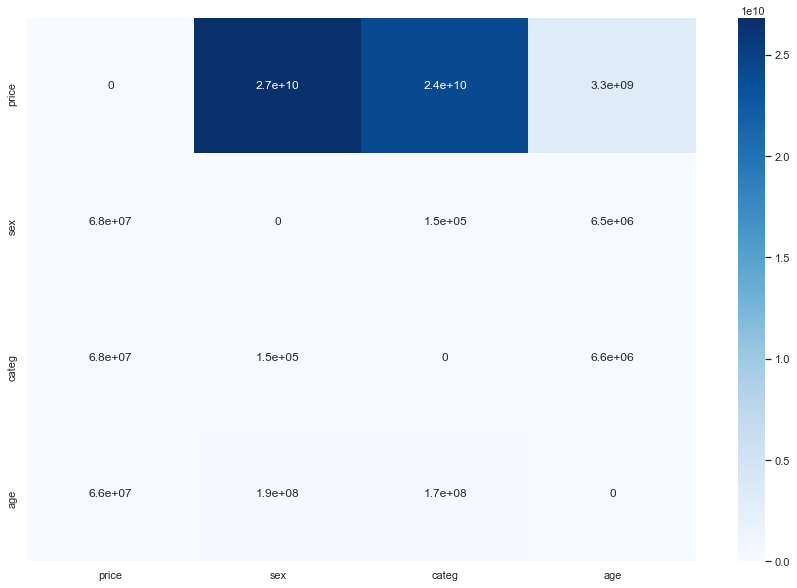

In [123]:
df = data[['price', 'sex', 'categ', 'age']].apply(lambda x : pd.factorize(x)[0])+1

chiCorr =  pd.DataFrame([st.chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df], index=data[['price', 'sex', 'categ', 'age']].columns, columns=data[['price', 'sex', 'categ', 'age']].columns)
sns.heatmap(chiCorr, annot=True, cmap='Blues')

<AxesSubplot:>

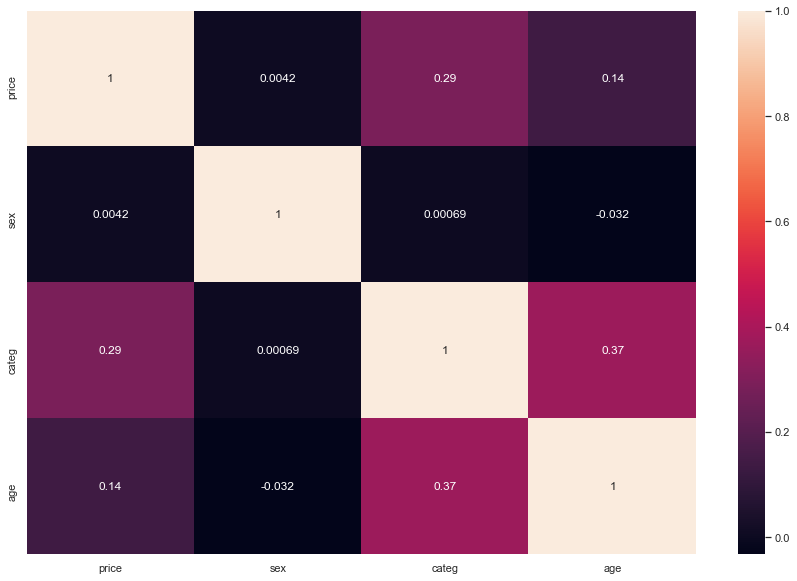

In [124]:
corrPear = data[['price', 'sex', 'categ', 'age']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(corrPear, annot=True)



**A concentration analysis, using a Lorenz curve and a Gini coefficient.**

We can see clearing how price values are from lower to higher value very uneven distributed.

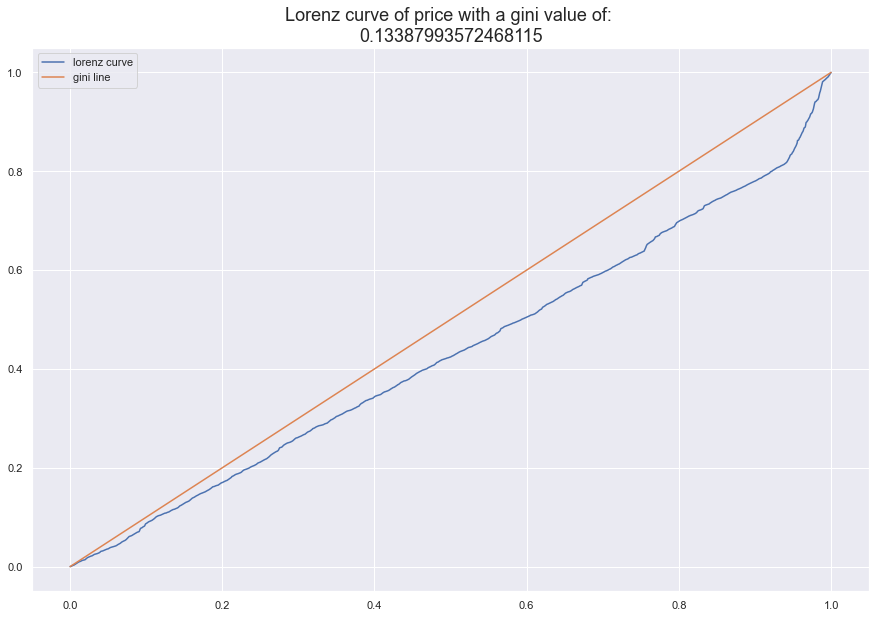

In [125]:
# Defining the gini function.
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

# Defining the Lorenz function.
def lorenz(arr):
    scale_prefix_sum = arr.cumsum() / arr.sum()
    return np.insert(scale_prefix_sum, 0, 0)
# Calculating the lorenz curve with prize values.
lorenz_curve = lorenz(data.price.values)
# Rendering Lorenz curve
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, label='lorenz curve')

# Visualizing the Lorenz curve relate to its gini value.
plt.plot([0,1], [0,1], label='gini line')
title = "Lorenz curve of price with a gini value of: \n{gini}".format(gini = gini(data.price.values))
plt.title(title, fontdict={'size': 18,})
plt.legend()
plt.savefig('./P5_03_graphics/lorenz_curve.png', dpi=300)
plt.show()

**Graphic representations, including at least one histogram,
a representation with boxplots, and a time series graph (i.e a graph in which the abscissa axis represents dates).**

How is the distribution of age between gender?
On males, they first quartile and the third are quite closer to they mean comparing to female.

Female ones have fewer outliers compare to males.

Both genders mean are between 40-50s.

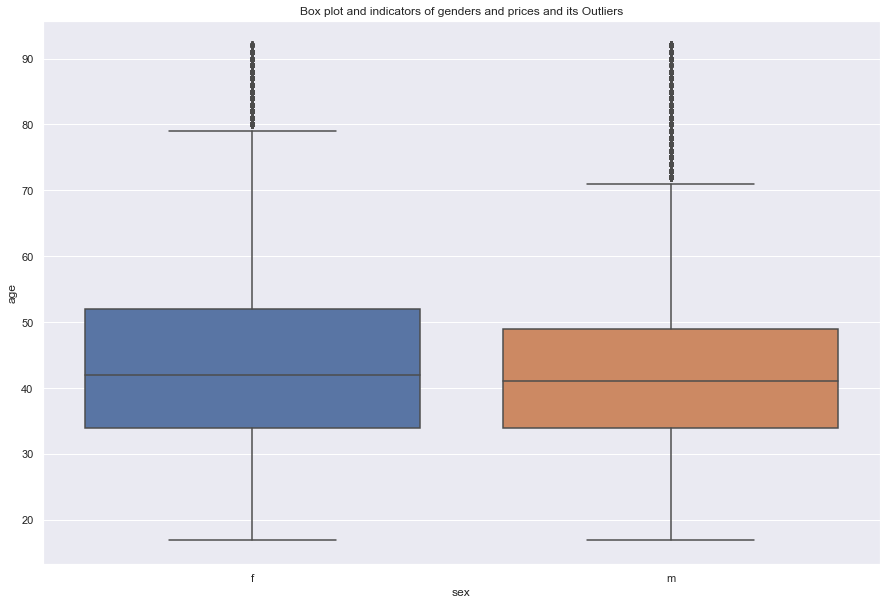

In [126]:
sns.boxplot(data=data, x='sex', y= 'age')
plt.title('Box plot and indicators of genders and prices and its Outliers')
plt.savefig('./P5_03_graphics/data_dispersion.png', dpi=300)

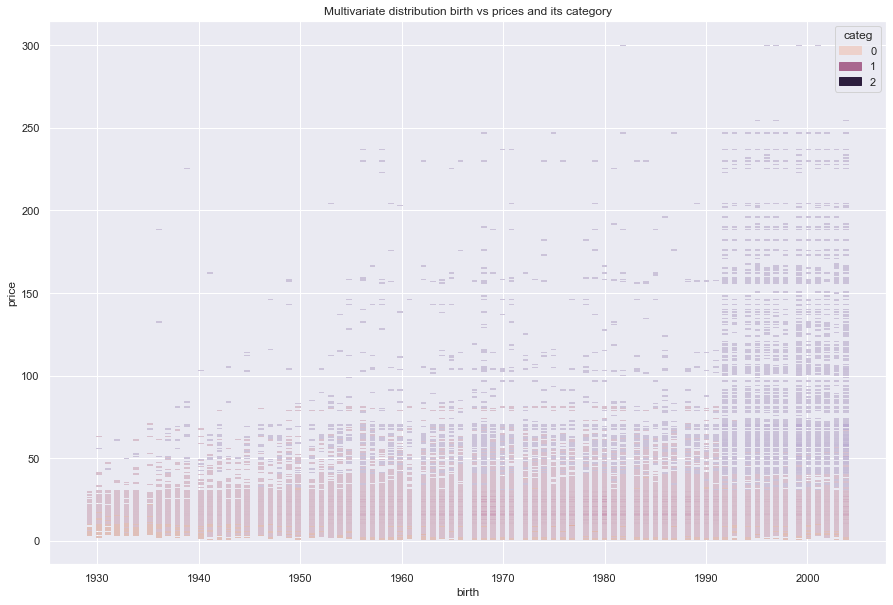

In [127]:
sns.histplot( data=data, x='birth', y='price', hue='categ')
plt.title('Multivariate distribution birth vs prices and its category')
plt.show()

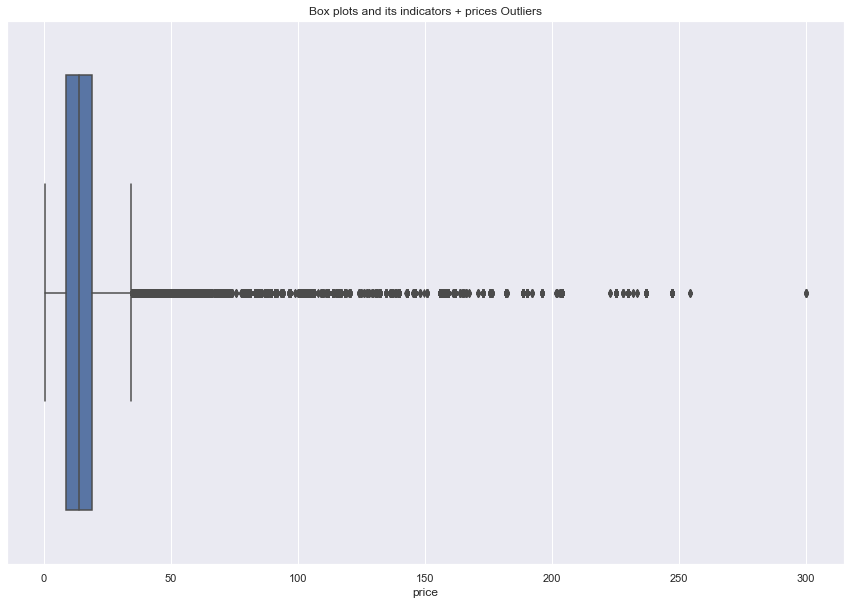

In [128]:
sns.boxplot(data= data, x='price')
plt.title('Box plots and its indicators + prices Outliers')
plt.show()

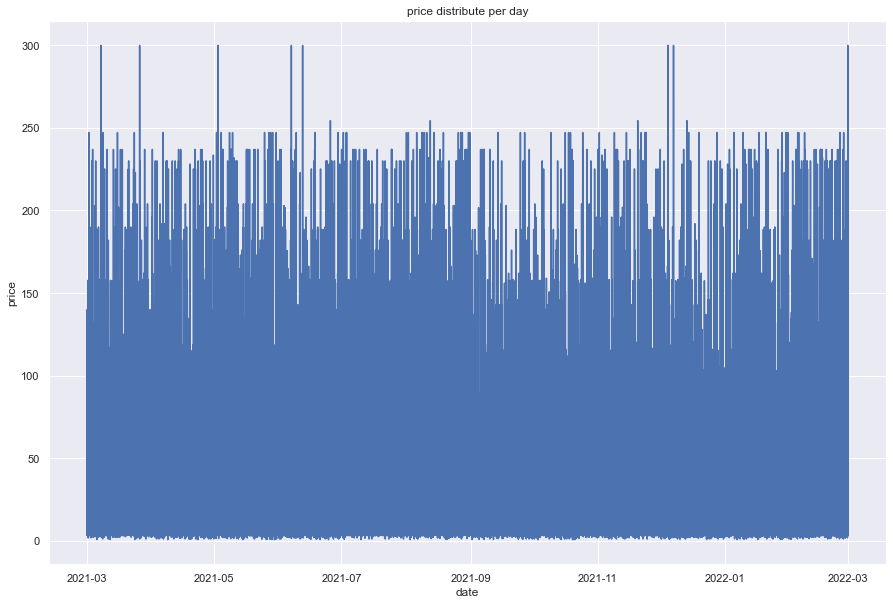

In [129]:
sns.lineplot(data=data, x='date', y= 'price')
plt.title('price distribute per day')
plt.show()

**Bivariate analysis.**

Text(0.5, 1.0, 'birth vs prices')

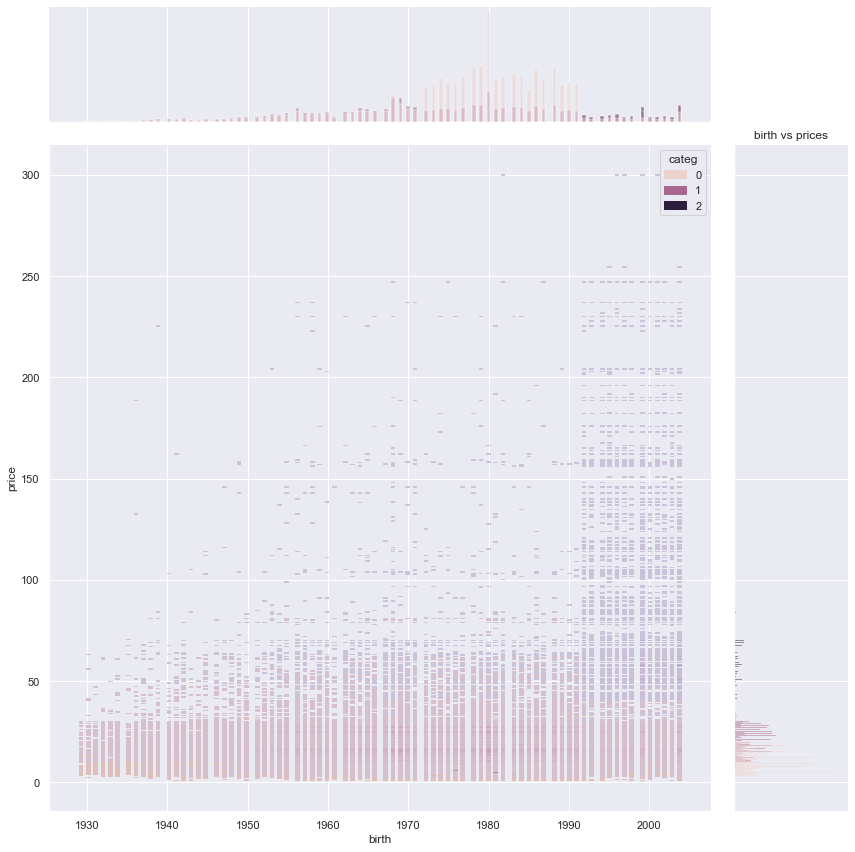

In [130]:
# Visualizing the distribution from 2 variables birth and price
sns.jointplot(data=data, x='birth', y='price', hue='categ', kind='hist', height=12)
plt.title('birth vs prices')


Text(0.5, 1.0, 'prices by dates distribution')

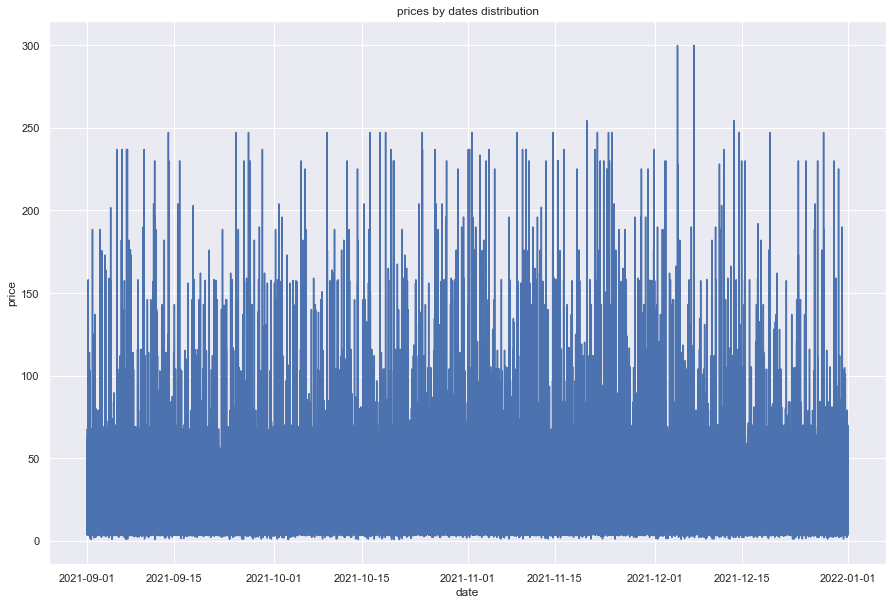

In [131]:
# Limit the values of price from 1970 to 2000 to see if there is any particularity visible.
data[(data.date.dt.year >= 1970) & (data.date.dt.year <= 2000)]
date_range = data[(data.date.dt.year == 2021) & (data.date.dt.month >= 9 )]
sns.lineplot(data=date_range, x='date', y='price')
plt.title('prices by dates distribution')

# task 3

- Is there a correlation between gender and categories of products purchased?

Male seams to paid for more costly product of category 2 them female.

Lower values for category 1 and 2 are from bellow 100.

Nevertheless, they have a similar distribution if category of products 0,1 are considered.

Text(0.5, 1.0, 'correlation gender and categories')

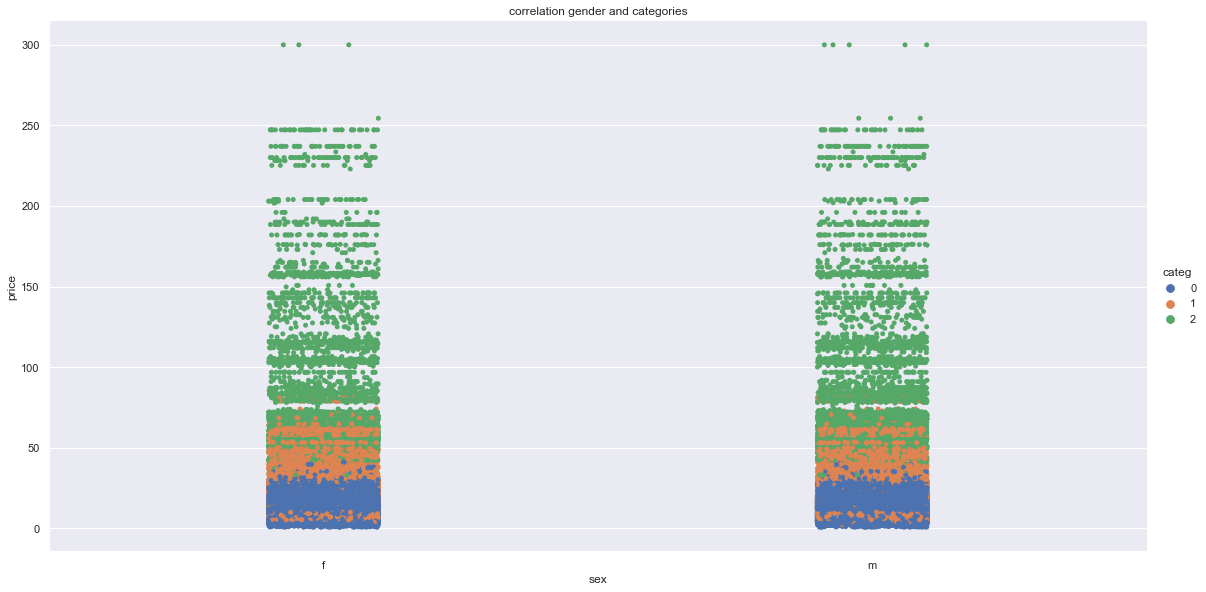

In [132]:
sns.catplot(data= data,  y='price', x='sex', hue='categ', height=height, aspect=aspect).savefig(
    './P5_03_graphics/correlation_gender_and_categories.png', dpi=300)
plt.title('correlation gender and categories')

Is there a correlation between gender and categories of products purchased?
Is there a correlation between age and:
   - The total amount of purchases?
   - The purchase frequency (the number of purchases per month for example)?
   - The average basket size (in number of items)?
   - Categories of purchased products?

## Starting with Qualitative and Quantitative variables' analysis and its indicators.
**Evaluating relation with the Chi^2  and Eta^2 indicators**

## Chi square test Between Sex and Categories of products.

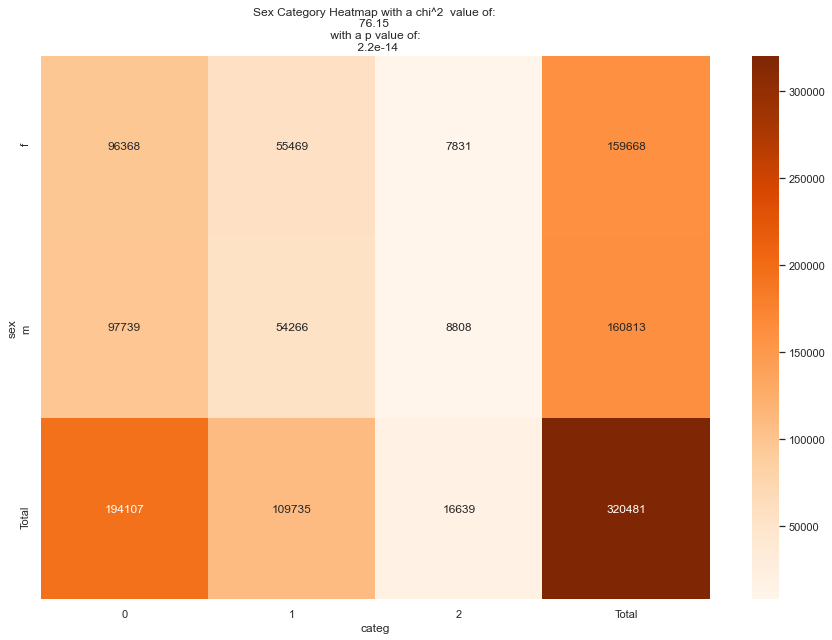

In [133]:
cont_data = data[['sex', 'date','categ']].copy()

cont_data1 = cont_data[(cont_data['date'] >= '2021-10-02') & (cont_data['date'] <= '2021-10-27')]
cont_data = pd.concat([cont_data, cont_data1, cont_data1]).drop_duplicates(keep=False)

X = "sex"
Y = "categ"

cont_sc = cont_data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

x_squared, p_value = st.chi2_contingency(cont_sc)[0:2]

title = "Sex Category Heatmap with a chi^2  value of: \n{chi_square} \n with a p value of: \n {p_value}"\
    .format(chi_square =round(x_squared,2), p_value =round(p_value,15))
plt.title("Sex_Category_Heatmap")

sns.heatmap(cont_sc, annot=True, cmap='Oranges', fmt='g')

plt.title(title)
plt.savefig('./P5_03_graphics/sex_category_heatmap.png', dpi=300)

## Eta squared

In [134]:
# eta_squared
def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS

## Age vs Prices using Eta square as correlation indicator.

In [135]:
## Age vs price_range analysis
sales_sample = sales.sort_values([('age_decades')]).copy()

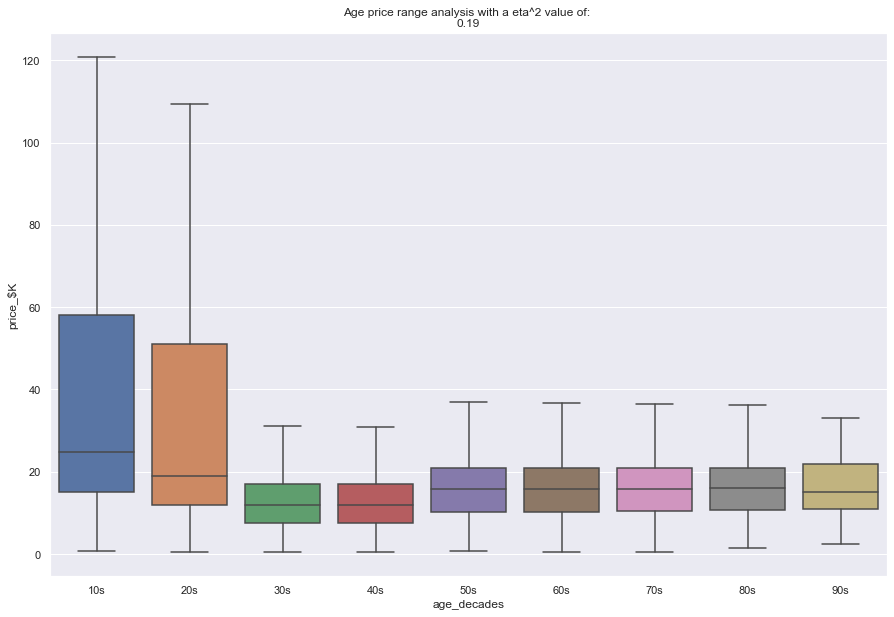

In [136]:
title = "Age price range analysis with a eta^2 value of: \n{eta_square}"\
    .format(eta_square = round(eta_squared(sales_sample['age_decades'],sales_sample['price_$K']),2))
sns.boxplot(data = sales, x='age_decades', y='price_$K', showfliers=False)

plt.title(title)
plt.savefig('./P5_03_graphics/age_price_range_analysis.png', dpi=300)

## Age vs purchases of products frequency.

In [137]:
## Age vs frequency of purchases
sales_count = sales.copy()
sales_count['counter'] = 1

sales_counts = sales_count.pivot_table(index=["age_decades","date"], values=["counter"], aggfunc=sum).fillna(0).reset_index()

sales_sample = sales_counts.sort_values([('age_decades')]).copy()

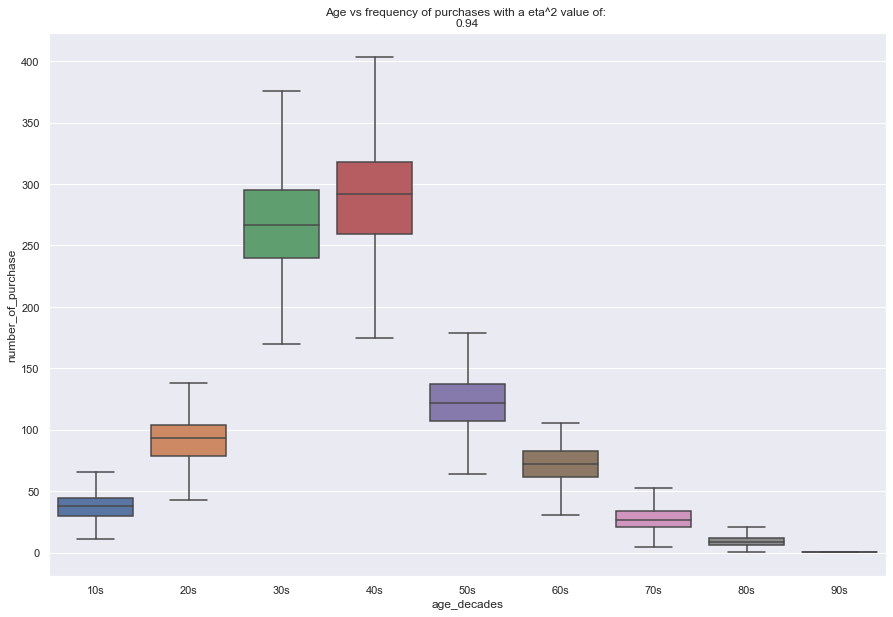

In [138]:
title = "Age vs frequency of purchases with a eta^2 value of: \n{eta_square}"\
    .format(eta_square = round(eta_squared(sales_sample['age_decades'],sales_sample['counter']),2))

sales_age_price = sales.groupby(['age_decades','date'])['price_$K'].apply(lambda group : group.tolist()).reset_index()
sales_age_price['number_of_purchase'] = sales_age_price['price_$K'].map(lambda v: np.count_nonzero(v))
sns.boxplot(data = sales_age_price, x='age_decades', y='number_of_purchase', showfliers=False)

plt.title(title)
plt.savefig('./P5_03_graphics/age_frequency_products.png', dpi=300)

 - The total amount of purchases?

As already spotted by the visualization of sales, there is a clear difference in age and products purchased.

in the middle age 25 - 45 there are more costly products purchased but decline more the clients approach old age.

In [139]:
#calcualting the total price per age.
age_group['total'] = age_group.price.map(lambda price: sum(price))

Text(0.5, 1.0, 'total amount purchases')

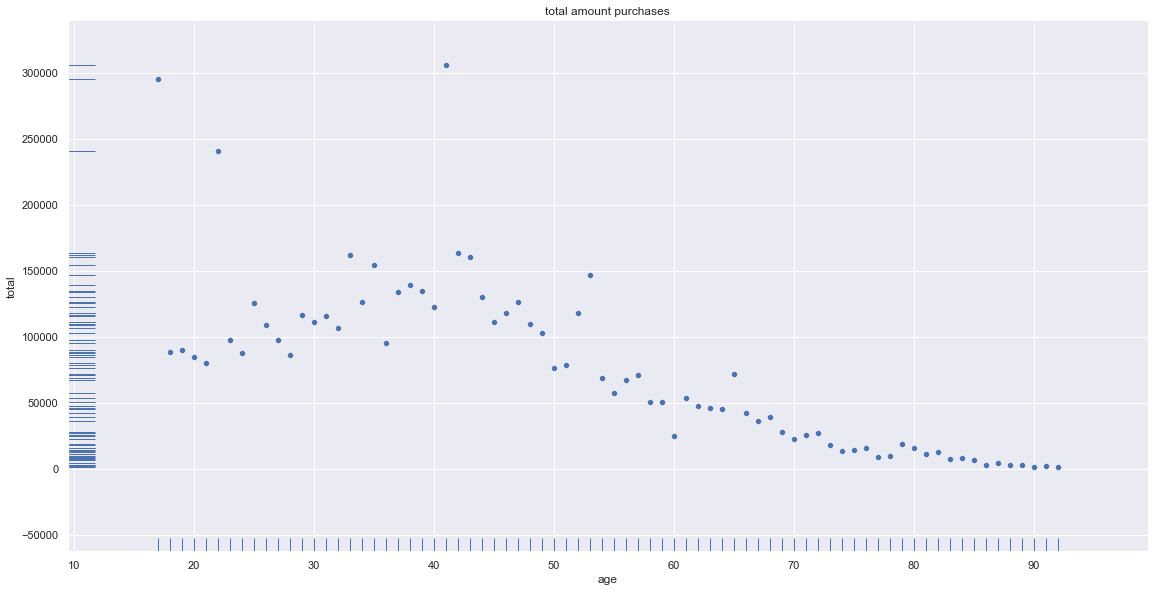

In [140]:
sns.relplot(data=age_group, x='age', y='total', height=height, aspect=aspect).savefig(
    './P5_03_graphics/total_amount_purchases.png', dpi=300)
sns.rugplot(data=age_group, x='age', y='total' )
plt.title('total amount purchases')

   - The purchase frequency (the number of purchases per month for example)?

Considering age group with a difference of 20 years like 20S, 40S and so on.

We see that during the whole year olds ones from 60s to 80s purchase far more products than young ones from 20s - 40s.
This could be explained by age and power of purchased. The 20s are still entering the job marketing and increasing the income.

60s customers reach they pick at February so the 80s.
From June until November there is an increase of customers from the 20s group.

Conclusion it seems that the sales should pay attention in promoting products for customs from group of 20s and 40s this
should be done during the entered years.


In [141]:
#calcualting the frequency price per age.
# grouping and creating another data frame with selected columns, extracting date as month names.
age_month_group = pd.DataFrame(data.groupby('age').head()[['date','age','price']])
age_month_group['months'] = age_month_group.date.dt.month_name()
age_month_group['age_labels'] = pd.cut(age_month_group.age, bins=[20, 40, 60, 80, 100], labels=['20s', '40s', '60s', '80s'])

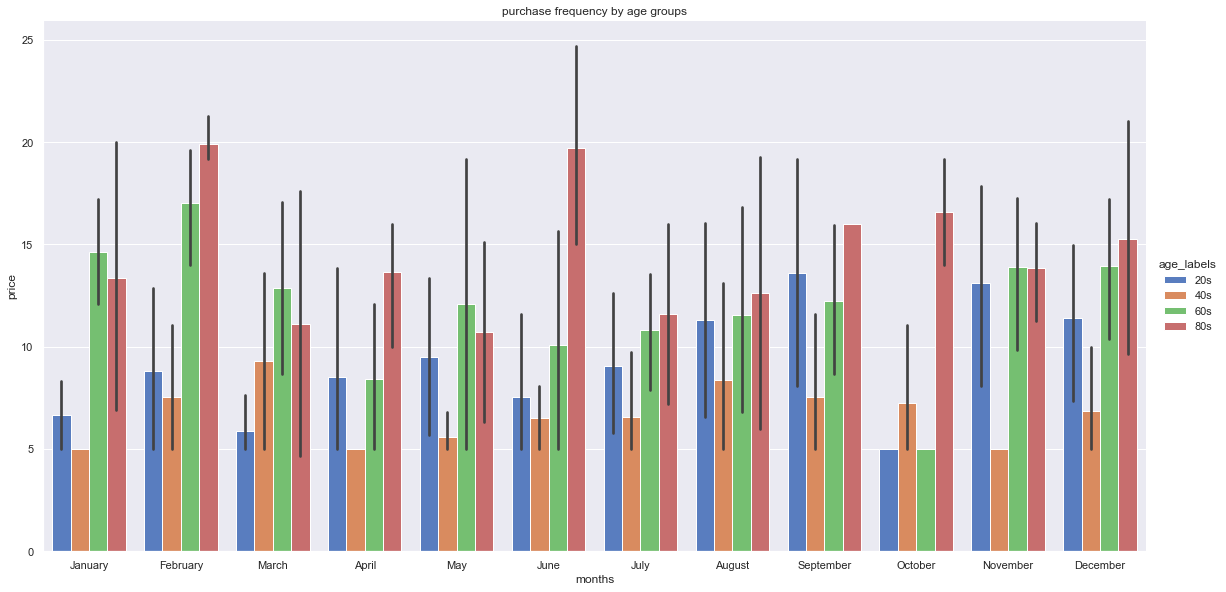

In [142]:
sns.catplot(data=age_month_group, x='months', y='price' , hue='age_labels', order=months_labels, kind='bar',
            palette="muted", height=height, aspect=aspect)\
    .set(title='purchase frequency by age groups').savefig('./P5_03_graphics/purchase_frequency.png', dpi=300)

- The average basket size (in number of items)?
The category of product 0 and 1 have a close number of items when consider the basket size, both slightly increase at old age.
Category of type 2 has definitely more items with age range  from 20 to 60.

In [143]:
# Grouping by category and age. creating a list of price and grouping to every age.
age_average_group = age_group = data.groupby(['age','categ'])['price'].apply(lambda group : group.tolist()).reset_index()
age_average_group = pd.DataFrame(age_group)

In [144]:
# calculating the mean of every age price list.
age_average_group['bk_size_avg'] = age_average_group.price.map(lambda v: np.mean(v))

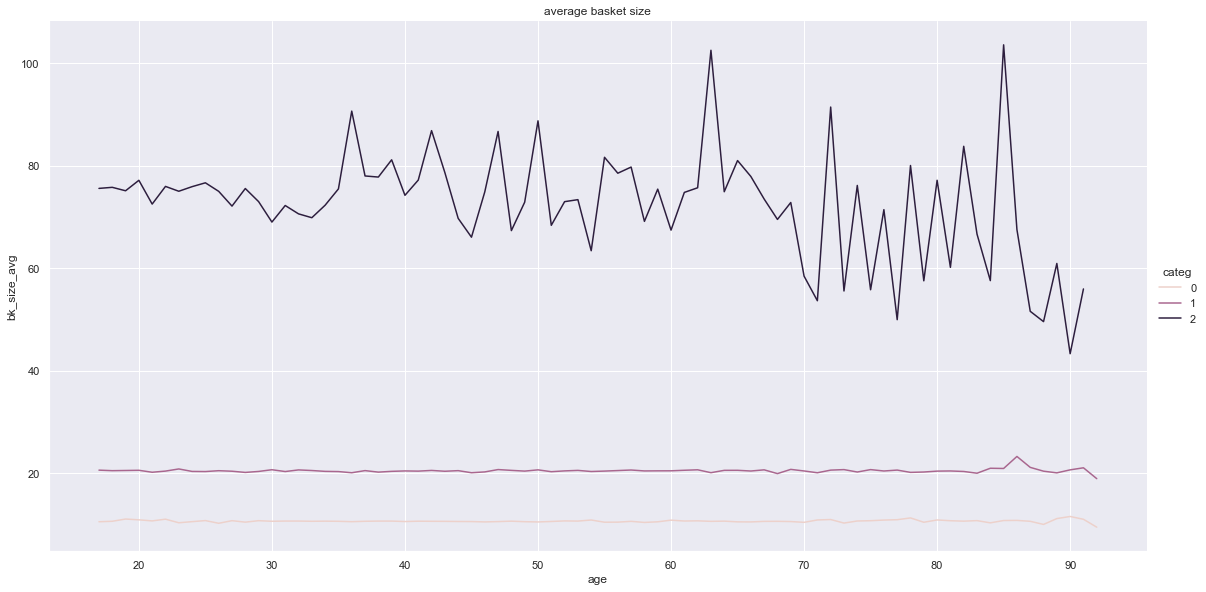

In [145]:
sns.relplot(data= age_average_group, x='age', y='bk_size_avg', hue='categ', kind='line', height=height, aspect=aspect)\
    .set(title='average basket size').savefig('./P5_03_graphics/average_basket_size.png', dpi=300)

 - Categories of purchased products?
If we consider the amount and how expensive the categories is and related this value with the age

we can see that less expensive category 0 and 1 is very dense aggregate and quite evenly distributed.

Category of type 2 is more spread between age groups even if there is a clear accumulation of expensive purchases of this
category withing age range of 10s-30s and is also more expensive.


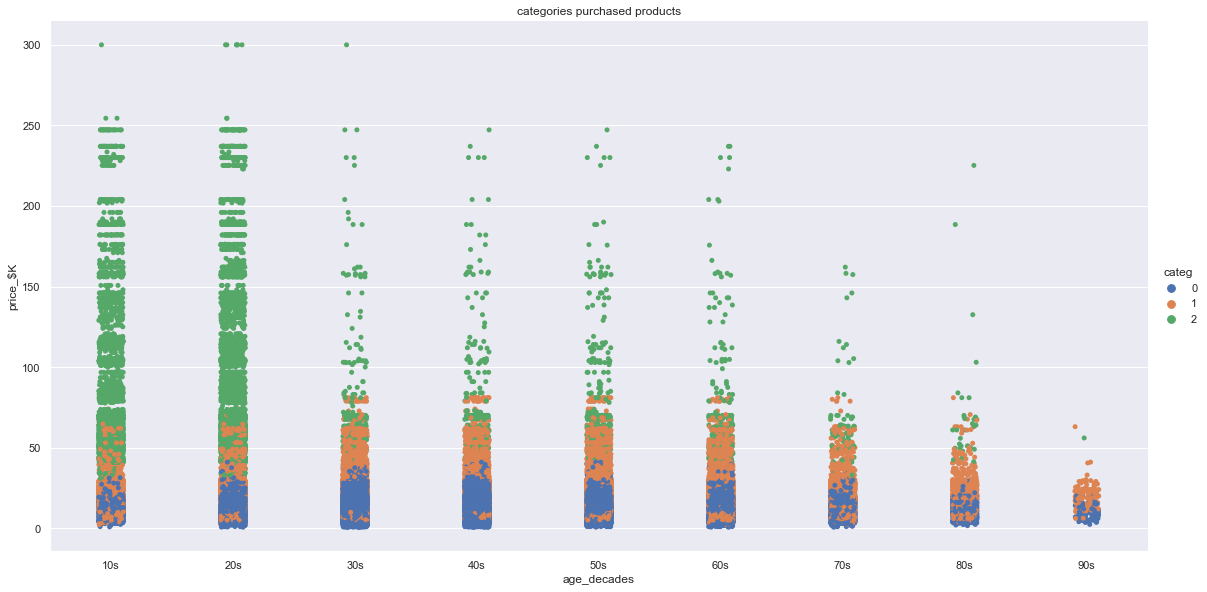

In [146]:
sns.catplot(data=sales,  y='price_$K', x='age_decades', hue='categ', height=height, aspect=aspect)\
    .set(title='categories purchased products').savefig('./P5_03_graphics/categories_purchased_products.png', dpi=300)